<a href="https://colab.research.google.com/github/aaronmed/sns/blob/master/UT3%20-%20Algoritmos%20y%20herramientas%20para%20el%20aprendizaje%20supervisado%20/Actividad%203.5%20%E2%80%93%20Clasificaci%C3%B3n%20de%20vinos/SNS_ACT3_5_AaronMedinaMelian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aarón Medina Melián

#Importación de las librerías necesarias

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.utils.multiclass import unique_labels

import joblib

#Importamos el dataset desde Github y limpiamos los valores nulos

In [2]:
winequality_red_url = 'https://raw.githubusercontent.com/aaronmed/sns/master/repositories/winequality-red.csv'
data = pd.read_csv(winequality_red_url, sep=";")

data.dropna(inplace=True)

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#Histogramas para cada característica

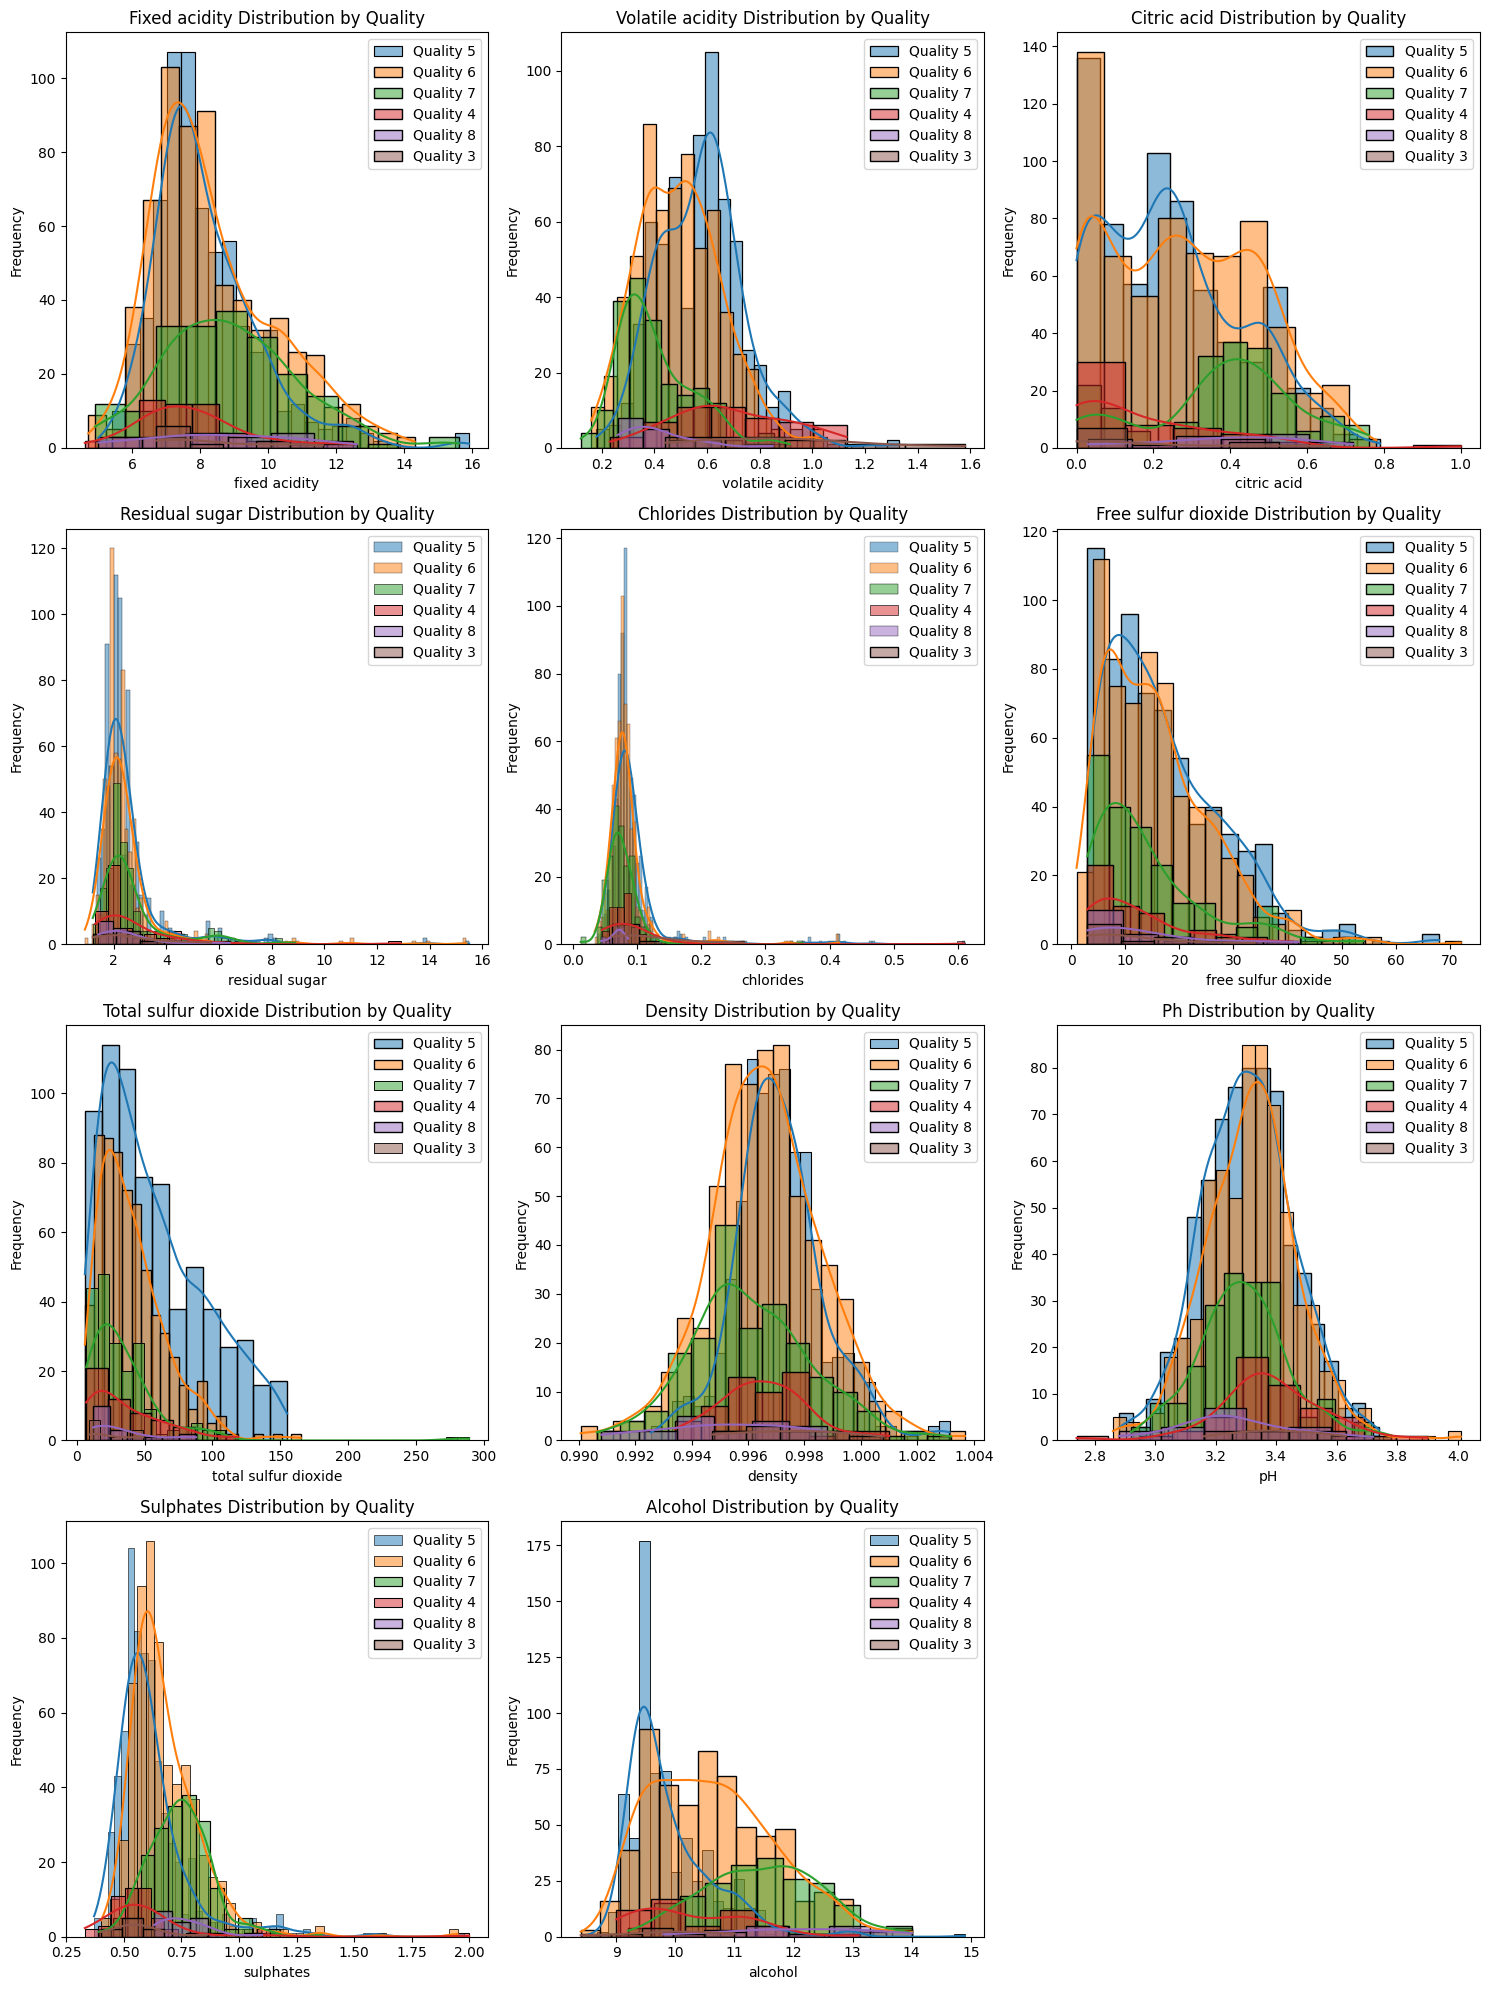

In [71]:
# Definir el número de columnas por fila
num_cols = 3
# Calcular el número total de subplots necesarios
total_subplots = len(data.columns[:-1])
# Calcular el número de filas necesarias
num_rows = (total_subplots - 1) // num_cols + 1

plt.figure(figsize=(15, 5*num_rows))

for i, column in enumerate(data.columns[:-1], 1):  # Excluyendo la columna 'quality'
    plt.subplot(num_rows, num_cols, i)
    for quality in data['quality'].unique():
        sns.histplot(data[data['quality'] == quality][column], label=f'Quality {quality}', kde=True)
    plt.title(f'{column.capitalize()} Distribution by Quality')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

#Boxplot para cada característica

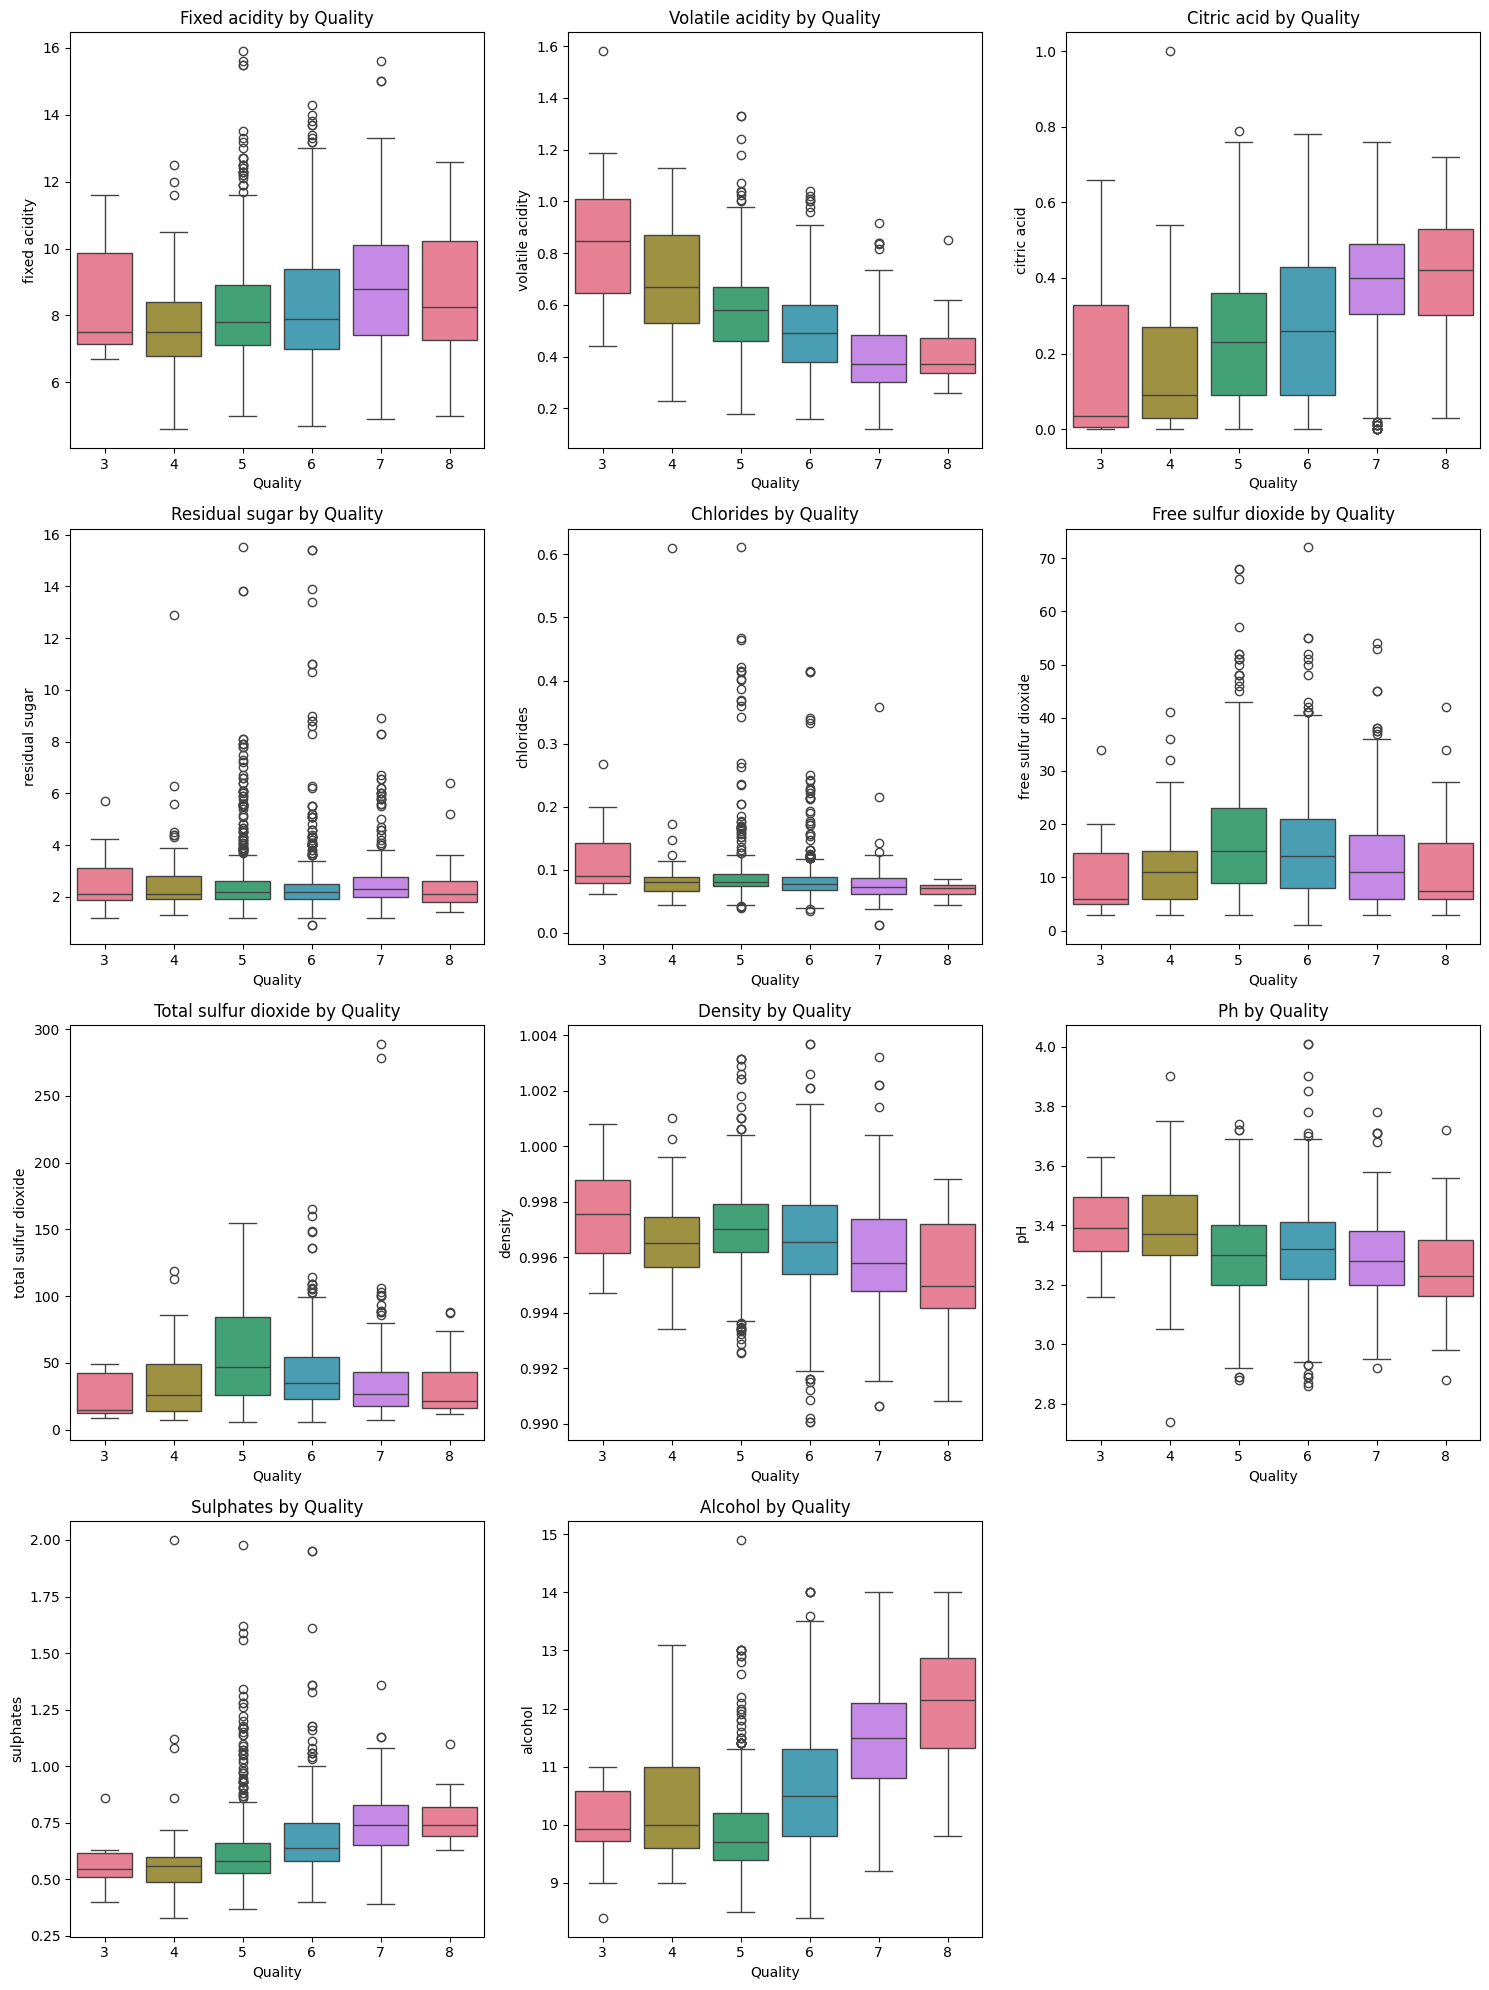

In [72]:
# Definir el número de columnas por fila
num_cols = 3
# Calcular el número total de subplots necesarios
total_subplots = len(data.columns[:-1])
# Calcular el número de filas necesarias
num_rows = (total_subplots - 1) // num_cols + 1

plt.figure(figsize=(15, 5*num_rows))

for i, column in enumerate(data.columns[:-1], 1):  # Excluyendo la columna 'quality'
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='quality', y=column, hue='quality', data=data, palette="husl", legend=False)
    plt.title(f'{column.capitalize()} by Quality')
    plt.xlabel('Quality')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

#Matriz de correlación de variables

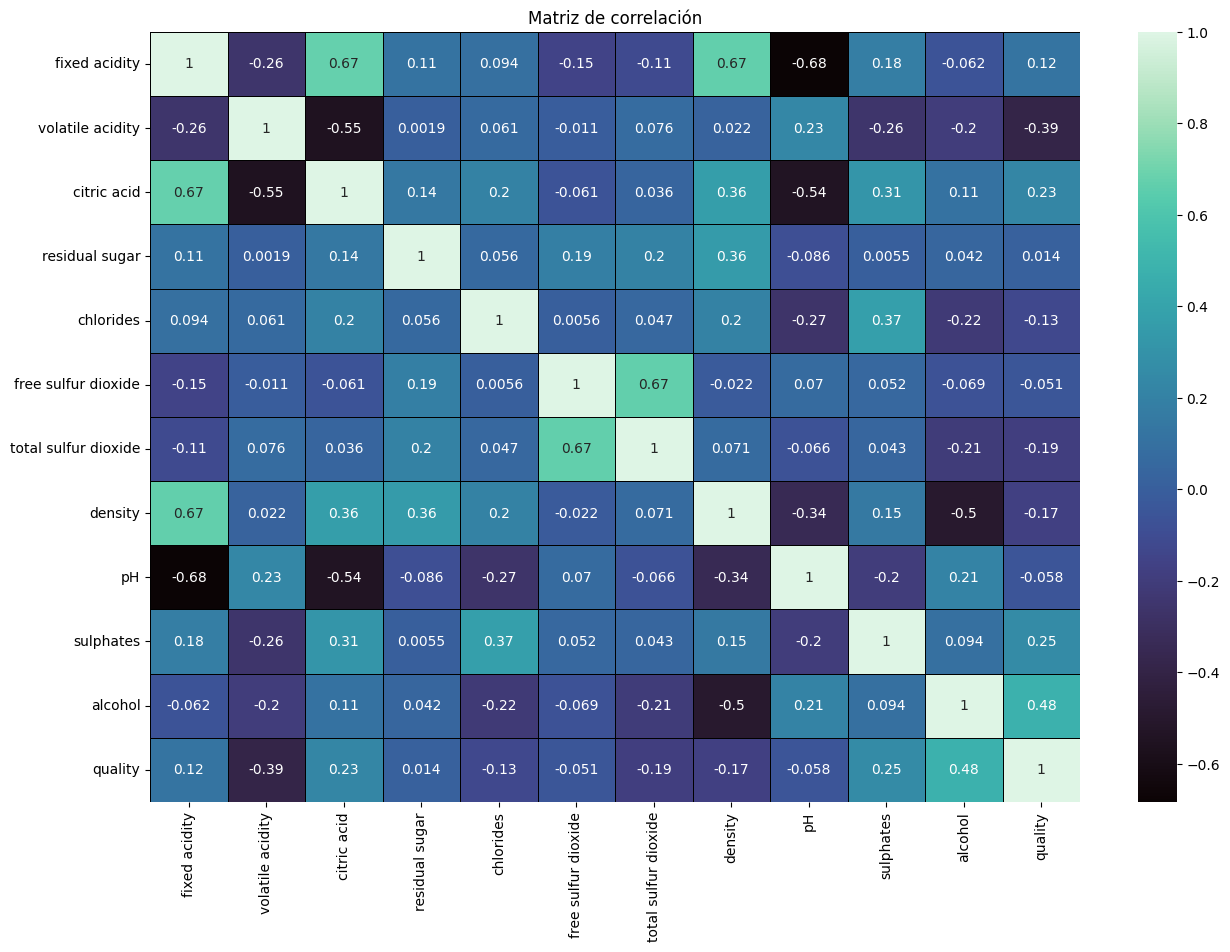

In [75]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='mako', linewidths=0.5, linecolor='black')

plt.title('Matriz de correlación')

plt.show()

#Técnicas de selección de variables

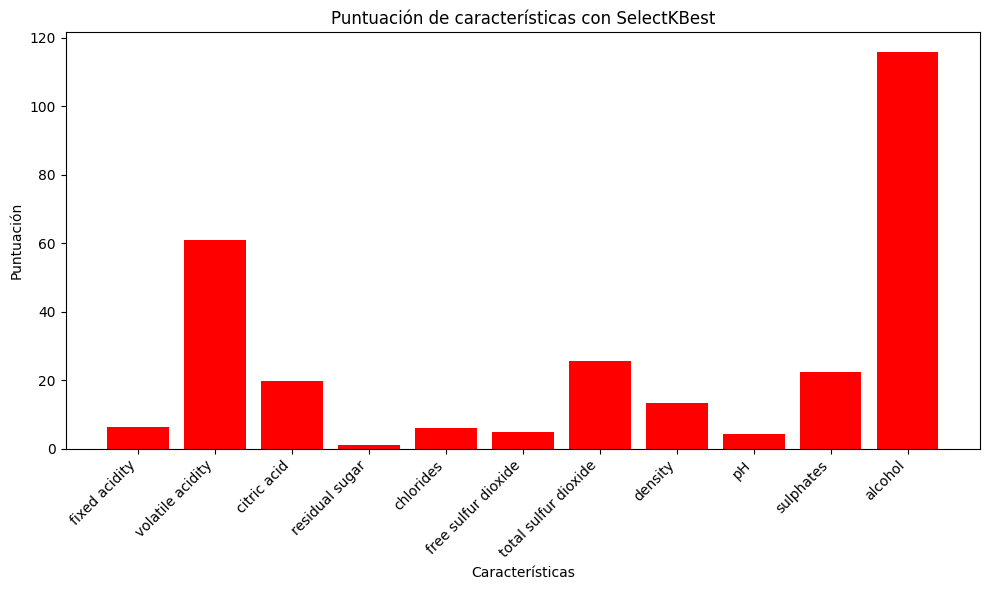

Características seleccionadas:
1. volatile acidity
2. citric acid
3. total sulfur dioxide
4. sulphates
5. alcohol


In [3]:
X = data.drop('quality', axis=1)
y = data['quality']

# Especificar el número de características a seleccionar
k = 5  # Seleccionar las 5 mejores características

# Aplicar SelectKBest para la selección de características
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X, y)

# Obtener las características seleccionadas
selected_features = selector.get_support(indices=True)

# Graficar la selección de características
plt.figure(figsize=(10, 6))
plt.bar(range(len(selector.scores_)), selector.scores_, tick_label=X.columns, color='red')
plt.title('Puntuación de características con SelectKBest')
plt.xlabel('Características')
plt.ylabel('Puntuación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Imprimir las características seleccionadas
print("Características seleccionadas:")
for i, feature_idx in enumerate(selected_features):
    print(f"{i+1}. {X.columns[feature_idx]}")

#Selección de características

In [4]:
data = data[['quality', 'volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']]

X = data.drop('quality', axis=1)
y = data['quality']

data

,quality,volatile acidity,citric acid,total sulfur dioxide,sulphates,alcohol
0,5,0.700,0.00,34.0,0.56,9.4
1,5,0.880,0.00,67.0,0.68,9.8
2,5,0.760,0.04,54.0,0.65,9.8
3,6,0.280,0.56,60.0,0.58,9.8
4,5,0.700,0.00,34.0,0.56,9.4
...,...,...,...,...,...,...
1594,5,0.600,0.08,44.0,0.58,10.5
1595,6,0.550,0.10,51.0,0.76,11.2
1596,6,0.510,0.13,40.0,0.75,11.0
1597,5,0.645,0.12,44.0,0.71,10.2


#Mostramos los variables que tiene quality en el dataset

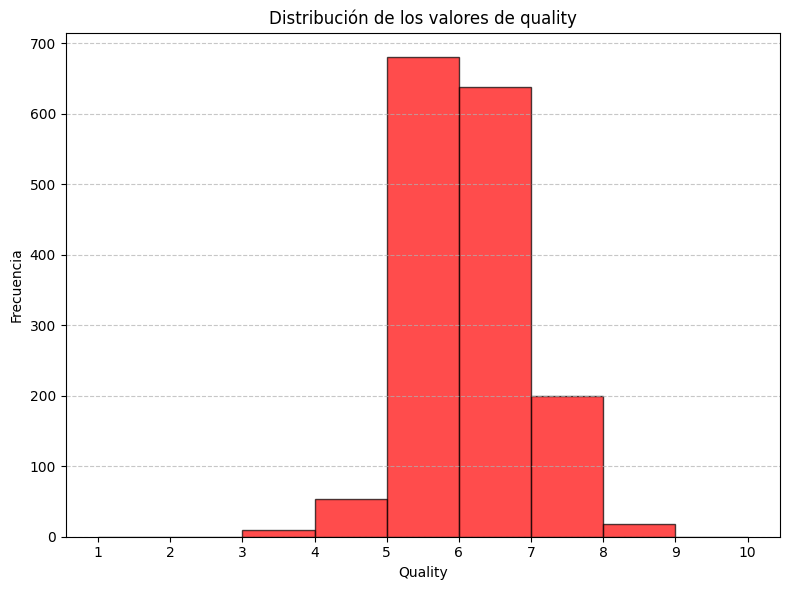

In [36]:
# Graficar los valores de quality
plt.figure(figsize=(8, 6))
plt.hist(y, bins=range(1, 11), color='red', edgecolor='black', alpha=0.7)
plt.title('Distribución de los valores de quality')
plt.xlabel('Quality')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Separamos las variables en Train y Test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelos a entrenar

In [17]:
# Modelos a entrenar
modelos = [
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier()
]

names = [
    "DecisionTreeClassifier",
    "ExtraTreeClassifier",
    "RandomForestClassifier",
    "ExtraTreesClassifier",
    "GradientBoostingClassifier",
    "AdaBoostClassifier",
    "BaggingClassifier"
]

cv = StratifiedKFold(n_splits = 5, shuffle = True) # shuffle = False si hay dimensión temporal
total_scores = []
for name, clf in zip(names, modelos):
  fold_accuracy = []
  for train_fold, test_fold in cv.split(X_train, y_train):
    # División train test aleatoria
    f_train_x = X_train.iloc[train_fold]           # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_y = y_train.iloc[train_fold]
    # entrenamiento y ejeución del modelo
    clf.fit(f_train_x, f_train_y)
    # Realizamos la predicción (Final evaluation) y guardamos la precisión para calcular la media posteriormente
    y_pred = clf.predict(X_train.iloc[test_fold])
    # evaluación del modelo
    acc = accuracy_score(y_train.iloc[test_fold], y_pred)
    fold_accuracy.append(acc)
  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for i in range(len(names)):
  print ("Modelo:%s =%6.2f" % (names[i], total_scores[i]))


Modelo:DecisionTreeClassifier =  0.60
Modelo:ExtraTreeClassifier =  0.58
Modelo:RandomForestClassifier =  0.67
Modelo:ExtraTreesClassifier =  0.66
Modelo:GradientBoostingClassifier =  0.62
Modelo:AdaBoostClassifier =  0.54
Modelo:BaggingClassifier =  0.65


#Función para la matriz de confusión

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    print("Metrics \n"
      +classification_report(y_true, y_pred))

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#Seleccionamos el modelo, buscamos los mejores párametros y entrenamos

Nos quedamos con RandomForestClassifier que es el que mejor precisión nos ha dado.

Buscamos el mejor valor para criterion

In [8]:
classifiers = {
    "gini": RandomForestClassifier(criterion="gini", random_state=42),
    "entropy": RandomForestClassifier(criterion="entropy", random_state=42),
    "log_loss": RandomForestClassifier(criterion="log_loss", random_state=42)
}

best_accuracy = 0
best_criterion = "gini"

for criterion, clf in classifiers.items():
  acc_scores = []
  print({criterion})
  for fold_idx, (train_fold, test_fold) in enumerate(cv.split(X_train, y_train), 1):
      # División train test aleatoria
      f_train_x = X_train.iloc[train_fold] # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
      f_train_y = y_train.iloc[train_fold]
      # entrenamiento
      clf.fit(f_train_x, f_train_y)
      y_pred = clf.predict(X_train.iloc[test_fold])
      acc = accuracy_score(y_train.iloc[test_fold], y_pred)
      acc_scores.append(acc)

  avg_acc = sum(acc_scores) / len(acc_scores)
  print(f"Accuracy: {avg_acc}\n")

  if avg_acc > best_accuracy:
    best_accuracy = avg_acc
    best_criterion = criterion

print(f"Mejor criterion: {best_criterion}, Precisión: {best_accuracy}")

{'gini'}
Accuracy: 0.6700582107843138

{'entropy'}
Accuracy: 0.6778860294117648

{'log_loss'}
Accuracy: 0.6700520833333333

Mejor criterion: entropy, Precisión: 0.6778860294117648


Buscamos el mejor valor para max_depth

In [9]:
best_accuracy = 0
best_max_depth = None

max_depths = []
accuracies = []

for max_depth in range(2, 30):
    print(f"Probando max_depth con {best_criterion}: {max_depth}")
    clf = RandomForestClassifier(max_depth=max_depth, criterion=best_criterion, random_state=42)
    acc_scores = []
    for train_fold, test_fold in cv.split(X_train, y_train):
        # División train test aleatoria
        f_train_x = X_train.iloc[train_fold] # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
        f_train_y = y_train.iloc[train_fold]
        # entrenamiento
        clf.fit(f_train_x, f_train_y)
        y_pred = clf.predict(X_train.iloc[test_fold])
        acc = accuracy_score(y_train.iloc[test_fold], y_pred)
        acc_scores.append(acc)

    avg_acc = sum(acc_scores) / len(acc_scores)
    print(f"Accuracy: {avg_acc}\n")

    max_depths.append(max_depth)
    accuracies.append(avg_acc)

    if avg_acc > best_accuracy:
      best_accuracy = avg_acc
      best_max_depth = max_depth

print(f"Mejor max_depth: {best_max_depth}, Precisión: {best_accuracy}")

Probando max_depth con entropy: 2
Accuracy: 0.5739093137254903

Probando max_depth con entropy: 3
Accuracy: 0.5996721813725491

Probando max_depth con entropy: 4
Accuracy: 0.6137530637254902

Probando max_depth con entropy: 5
Accuracy: 0.6145435049019607

Probando max_depth con entropy: 6
Accuracy: 0.6363909313725491

Probando max_depth con entropy: 7
Accuracy: 0.6418995098039215

Probando max_depth con entropy: 8
Accuracy: 0.6473468137254902

Probando max_depth con entropy: 9
Accuracy: 0.6591207107843138

Probando max_depth con entropy: 10
Accuracy: 0.6684957107843138

Probando max_depth con entropy: 11
Accuracy: 0.6700428921568627

Probando max_depth con entropy: 12
Accuracy: 0.6778982843137256

Probando max_depth con entropy: 13
Accuracy: 0.6520741421568628

Probando max_depth con entropy: 14
Accuracy: 0.680998774509804

Probando max_depth con entropy: 15
Accuracy: 0.6762867647058823

Probando max_depth con entropy: 16
Accuracy: 0.6731740196078431

Probando max_depth con entropy: 17

Mostramos como va cambiando la precisión según cambia el valor de max_depth

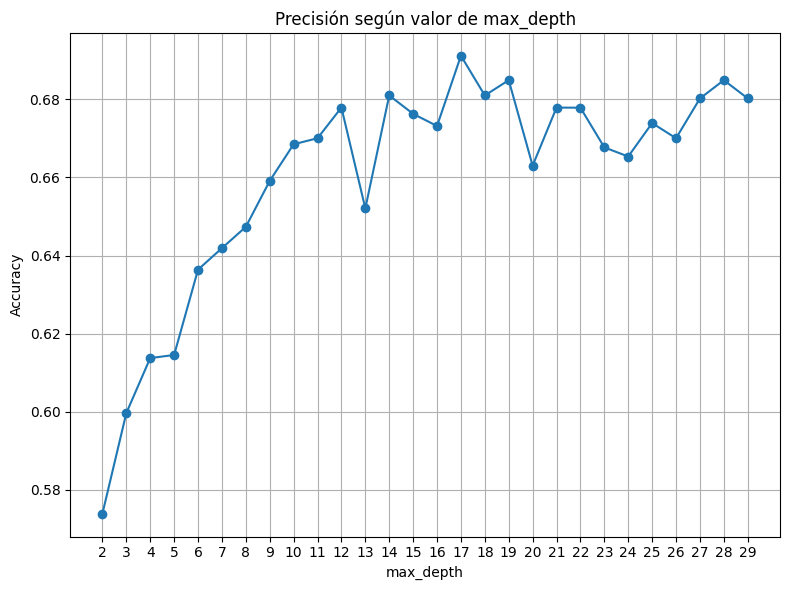

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(max_depths, accuracies, marker='o')
plt.title('Precisión según valor de max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(2, 30))
plt.tight_layout()
plt.show()

Entrenamos con los párametros que hemos seleccionado

In [11]:
model_selected = RandomForestClassifier(max_depth=best_max_depth, criterion=best_criterion, random_state=42)

for train_fold, test_fold in cv.split(X_train, y_train):
    # División train test aleatoria
    f_train_x = X_train.iloc[train_fold] # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_y = y_train.iloc[train_fold]
    # entrenamiento
    clf.fit(f_train_x, f_train_y)
    y_pred = clf.predict(X_train.iloc[test_fold])
    acc = accuracy_score(y_train.iloc[test_fold], y_pred)
    acc_scores.append(acc)

avg_acc = sum(acc_scores) / len(acc_scores)
print(f"Accuracy: {avg_acc}\n")

Accuracy: 0.6708455882352942



In [28]:
model_selected = RandomForestClassifier(max_depth=best_max_depth, criterion=best_criterion, random_state=42)

model_selected.fit(X_train, y_train)

y_pred = model_selected.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Precisión:", acc)

Precisión: 0.675


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.81      0.76       130
           6       0.64      0.67      0.66       132
           7       0.65      0.52      0.58        42
           8       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.34      0.33      0.33       320
weighted avg       0.64      0.68      0.66       320

Confusion matrix, without normalization
[[  0   0   0   1   0   0]
 [  0   0   5   5   0   0]
 [  0   0 105  24   1   0]
 [  0   0  36  89   7   0]
 [  0   1   0  18  22   1]
 [  0   0   0   1   4   0]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

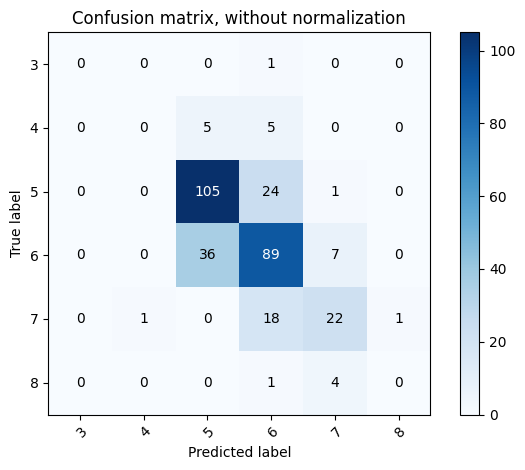

In [29]:
plot_confusion_matrix(y_test, y_pred, classes = np.array(['0',',1','2','3','4','5','6','7','8','9','10']), normalize=False)

Metrics 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.81      0.76       130
           6       0.64      0.67      0.66       132
           7       0.65      0.52      0.58        42
           8       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.34      0.33      0.33       320
weighted avg       0.64      0.68      0.66       320

Normalized confusion matrix
[[0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.5        0.5        0.         0.        ]
 [0.         0.         0.80769231 0.18461538 0.00769231 0.        ]
 [0.         0.         0.27272727 0.67424242 0.0530303  0.        ]
 [0.         0.02380952 0.         0.42857143 0.52380952 0.02380952]
 [0.         0.         0.         0.2        0.8        0.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

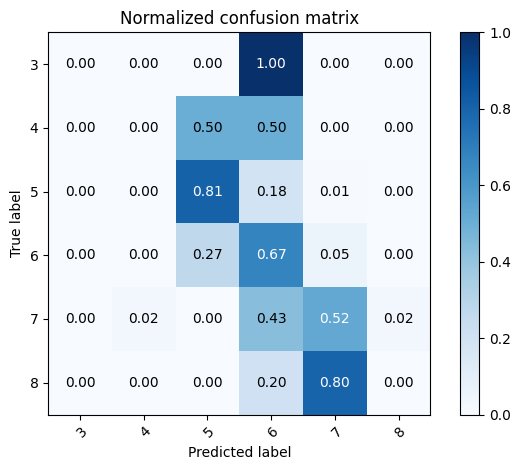

In [30]:
plot_confusion_matrix(y_test, y_pred, classes = np.array(['0',',1','2','3','4','5','6','7','8','9','10']), normalize=True)

#Exportamos, importamos el modelo y volvemos a predecir

In [34]:
name_model = 'ModelSelectedVinosTintos.pkl'

joblib.dump(model_selected, name_model)

['ModelSelectedVinosTintos.pkl']

In [36]:
model_imported = joblib.load(name_model)

In [41]:
y_pred_model_imported = model_imported.predict(X)

Metrics 
              precision    recall  f1-score   support

           3       1.00      0.90      0.95        10
           4       0.98      0.81      0.89        53
           5       0.94      0.96      0.95       681
           6       0.92      0.93      0.93       638
           7       0.94      0.90      0.92       199
           8       0.93      0.72      0.81        18

    accuracy                           0.93      1599
   macro avg       0.95      0.87      0.91      1599
weighted avg       0.94      0.93      0.93      1599

Confusion matrix, without normalization
[[  9   0   0   1   0   0]
 [  0  43   5   5   0   0]
 [  0   0 656  24   1   0]
 [  0   0  36 595   7   0]
 [  0   1   0  18 179   1]
 [  0   0   0   1   4  13]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

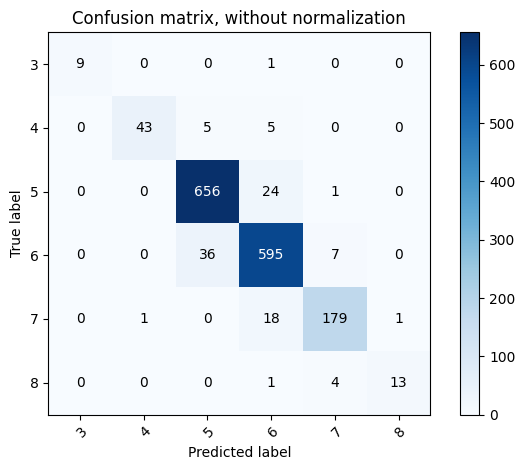

In [42]:
plot_confusion_matrix(y, y_pred_model_imported, classes = np.array(['0',',1','2','3','4','5','6','7','8','9','10']), normalize=False)

Metrics 
              precision    recall  f1-score   support

           3       1.00      0.90      0.95        10
           4       0.98      0.81      0.89        53
           5       0.94      0.96      0.95       681
           6       0.92      0.93      0.93       638
           7       0.94      0.90      0.92       199
           8       0.93      0.72      0.81        18

    accuracy                           0.93      1599
   macro avg       0.95      0.87      0.91      1599
weighted avg       0.94      0.93      0.93      1599

Normalized confusion matrix
[[0.9        0.         0.         0.1        0.         0.        ]
 [0.         0.81132075 0.09433962 0.09433962 0.         0.        ]
 [0.         0.         0.96328928 0.03524229 0.00146843 0.        ]
 [0.         0.         0.05642633 0.93260188 0.01097179 0.        ]
 [0.         0.00502513 0.         0.09045226 0.89949749 0.00502513]
 [0.         0.         0.         0.05555556 0.22222222 0.72222222]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

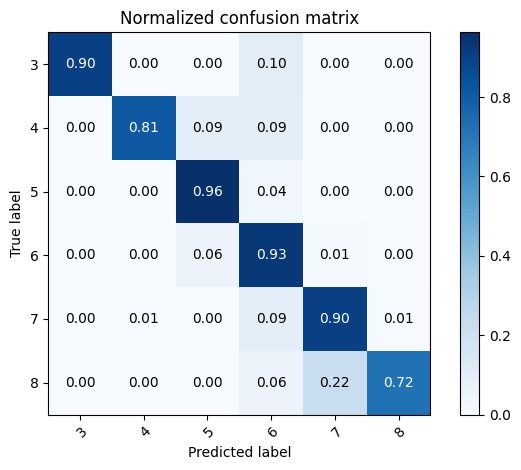

In [43]:
plot_confusion_matrix(y, y_pred_model_imported, classes = np.array(['0',',1','2','3','4','5','6','7','8','9','10']), normalize=True)